<a href="https://colab.research.google.com/github/samuelgamaral/Analise_Sentimento/blob/main/Analise_Sentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'Analise_Sentimento' already exists and is not an empty directory.


,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Review       0
Sentiment    0
dtype: int64

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.84      0.70      0.77       435
           1       0.72      0.86      0.78       390

    accuracy                           0.77       825
   macro avg       0.78      0.78      0.77       825
weighted avg       0.79      0.77      0.77       825



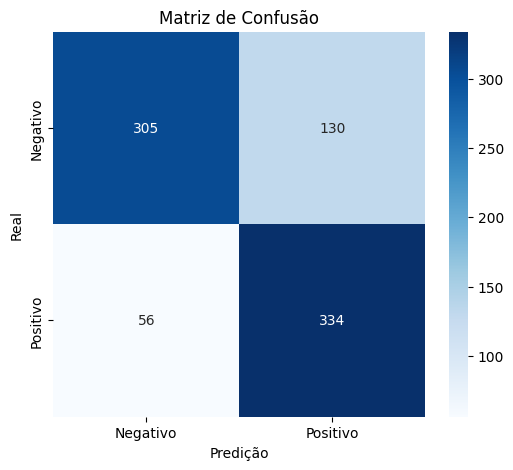

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

!git clone https://github.com/samuelgamaral/Analise_Sentimento.git

# Carregando cada arquivo para um dataframe pandas
df_amazon = pd.read_csv('/content/Analise_Sentimento/sentiment labelled sentences/amazon_cells_labelled.txt', sep='\t', header=None, names=['Review', 'Sentiment'])
df_imdb = pd.read_csv('/content/Analise_Sentimento/sentiment labelled sentences/imdb_labelled.txt', sep='\t', header=None, names=['Review', 'Sentiment'])
df_yelp = pd.read_csv('/content/Analise_Sentimento/sentiment labelled sentences/yelp_labelled.txt', sep='\t', header=None, names=['Review', 'Sentiment'])

# Concatenando os dados e unificando em um único dataframe
df = pd.concat([df_amazon, df_imdb, df_yelp], axis=0, ignore_index=True)

display(df.head())

# Verificando se existem valores nulos.
print(df.isnull().sum())

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review'])

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.3, random_state=42)

# Criando um pipeline
model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())

# Treinando o modelo
model.fit(X_train, y_train)

# Efetuando o predict
y_pred = model.predict(X_test)

# Relatório com indicadores de desempenho
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Criando o gráfico para a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [27]:
import joblib

# Salvar o modelo para uso futuro
joblib.dump(model, 'modelo_MultinomialNB.pkl')

['modelo_MultinomialNB.pkl']

In [28]:
# Carregando o modelo que foi salvo para ser usado com novos dados
kmeans_loaded = joblib.load('modelo_MultinomialNB.pkl')